Автор: [Илья Ощепков](https://thegeodesy.com/)


Мы переходим к рассмотрению шаровых и сферических функций, которые являются решением уравнения Лапласа в сферических координатах. Шаровые и сферические функции имеют большое значение во многих теоретических и практических приложениях, в частности в задачах расчёта электронных орбиталей в атоме, **моделировании гравитационных и магнитных полей планет** и звёзд, описания интенсивности реликтового излучения. В трёхмерной компьютерной графике эти специальные функции используются для описания трёхмерных объектов, а также различных реалистичных имитаций освещённости. Во всех этих областях приняты свои системы обозначений, способы нормирования (об этом мы поговорим позже) и формы записи сферических функций. Мы будем придерживаться обозначений, принятых в геодезии.

В ходе изложения мы будем иногда использовать язык программирования Python, как для аналитических выкладок с помощью пакета [SymPy](https://www.sympy.org), так и для численных расчётов и построения графиков. Возможно, это повзолит добавить наглядности и разбавит сухие теоретические выкладки.

# 1. Уравнение Лапласа в сферических координатах

Нас интересует решение дифференциального уравнения в частных производных второго порядка вида
$$\Delta f = \frac{\partial^2 f}{\partial x^2} + 
\frac{\partial^2 f}{\partial y^2} +
\frac{\partial^2 f}{\partial z^2} = 0,$$
которое называется уравнением Лапласа. Здесь $x, y, z$ - прямоугольные координаты, $f = f(x, y, z)$ - функция, которая удовлетворяет уравнению, то есть является его решением, $\Delta = \nabla^2 = \frac{\partial^2}{\partial x^2} + 
\frac{\partial^2}{\partial y^2} +
\frac{\partial^2}{\partial z^2}$ - оператор Лапласа ("лапласиан").

Функции, имеющие непрерывные производные первого и второго порядков и удволетворяющие уравнению Лапласа называются **гармоническими**.

В геодезических приложениях уравнение Лапласа решают либо в сферических, либо в эллипсоидальных координатах (но не геодезических!). Прежде, чем приступать к конкретному решению, сначала надо выразить лапласиан в этих координатах. Представляется удобным однако выработать некоторые общий подход к этой проблеме и ввести криволинейные координаты.

## Криволинейные координаты

Положение произвольной точки в трёхмерном пространстве задаётся в прямоугольных координатах $x, y, z$ её радиус-вектором
$$\mathbf{r} = x \mathbf{i} + y \mathbf{j} + z \mathbf{k},$$
где $(\mathbf{i}, \mathbf{j}, \mathbf{k})$ - единичные базисные векторы, направленные вдоль осей декартовой системы координат.

Пусть теперь заданы некие криволинейные координаты $q_1, q_2, q_3$ (пример: сферические ($r,\vartheta, \lambda$), геодезические ($H, B, L$)). Они однозначно связаны с прямоугольными координатами $x, y, z$ гладкими функциям $\varphi_1, \varphi_2, \varphi_3$:

$$ \left\{\begin{matrix} x = \varphi_1\left(q_1,\;q_2,\;q_3\right),\\ y = \varphi_2\left(q_1,\;q_2,\;q_3\right), \\ z = \varphi_3\left(q_1,\;q_2,\;q_3\right).\end{matrix}\right.$$

Системы координат образуются пересекающимися **координатными поверхностями**, которые можно построить, зафиксировав одну из координат $q_i$. На пересечении координатных поверхностей находятся **координатные линии**, которые можно построить, если зафиксировать две координаты $q_i$. В общем случае координатные поверхности и линии будут кривыми, отсюда и название - **криволинейные координаты**. **Координатые оси** направлены по касательным к координатным линиям в точке пересечения координатых поверхностей. В общем случае и в отличие от декартовой системы, координатные оси криволинейной системы координат имеют разное направление в каждой точке пространства.

**Пример.** Сферическая система координат образована пересечением плоскости меридиана ($\lambda = const$), сферы ($r = const$) и бесконечного конуса ($\vartheta = const$). Координатными линиями служат: прямая ($\lambda=const, \vartheta=const$, пересечение плоскости меридиана и бесконечного конуса), дуга большого круга сферы радиуса $r$ ($ r=const, \lambda=const$, пересечение сферы и плоскости) и дуга малого круга ($r=const, \vartheta=const$, пересечение сферы и бескоенчного конуса).

Если в любой точке координатные поверхности и линии попарно ортогональны, то есть касательные к ним попарно перпендикулярны, то система координат называется **ортогональной**, если под косым углом, то - **косоугольной**. В геодезии всегда используются только ортогональные системы, поэтому будем рассматривать преимущественно их. Не стоит путать ортогональные и прямоугольные (декартовы) координаты. Последние сами являются ортогональными, а также частным случаем криволинейных. 

### Локальный базис и коэффициенты Ламе

В декартовой системе координат базисные векторы могут быть найдены через частные производные по радиус-вектору:
$$
\mathbf{i} = \dfrac{\partial \mathbf{r}}{\partial x},\quad
\mathbf{j} = \dfrac{\partial \mathbf{r}}{\partial y},\quad
\mathbf{k} = \dfrac{\partial \mathbf{r}}{\partial z}.
$$

Составляя аналогичные производные для криволинейной системы
$$
\mathbf{h}_1 = \dfrac{\partial \mathbf{r}}{\partial q_1},\quad
\mathbf{h}_2 = \dfrac{\partial \mathbf{r}}{\partial q_2},\quad
\mathbf{h}_3 = \dfrac{\partial \mathbf{r}}{\partial q_3},
$$
получим **локальный базис** в текущей точке. В отличие от **глобального базиса**, например декартовой системы, локальный базис, как и координатные оси, имеет разное направление в каждой точке пространства. В общем случае локальный базис может не быть единичным и не быть ортогональным.

Для ортогонального локального базиса, то есть для ортогональной криволинейной системы координат, можно ввести масштабные коэффициент или коэффиценты Ламе
$$
h_1 = |\mathbf{h}_1|,\quad h_2 = |\mathbf{h}_2|,\quad h_3 = |\mathbf{h}_3|.
$$

То есть **коэффициентами Ламе** $h_1, h_2, h_3$, соответствующими данной ортогональной криволинейной системе координат, называются модули частных производных радиуса-вектора $\mathbf{r}$ текущей точки по её криволинейным координатам $q_1, q_2, q_3$. В явном и пригодном для вычисления виде это можно записать следующим образом
$$
\begin{align}
h_1 &= \left|\dfrac{\partial \mathbf{r}}{\partial q_1} \right| =  \sqrt{
\left( \dfrac{\partial x}{\partial q_1}\right)^2 +
\left( \dfrac{\partial y}{\partial q_1}\right)^2 +
\left( \dfrac{\partial z}{\partial q_1}\right)^2},\\
h_2 &= \left|\dfrac{\partial \mathbf{r}}{\partial q_2} \right| = \sqrt{
\left( \dfrac{\partial x}{\partial q_2}\right)^2 +
\left( \dfrac{\partial y}{\partial q_2}\right)^2 +
\left( \dfrac{\partial z}{\partial q_2}\right)^2},\\
h_3 &= \left|\dfrac{\partial \mathbf{r}}{\partial q_3} \right| = \sqrt{
\left( \dfrac{\partial x}{\partial q_3}\right)^2 +
\left( \dfrac{\partial y}{\partial q_3}\right)^2 +
\left( \dfrac{\partial z}{\partial q_3}\right)^2}.
\end{align}
$$

Через коэффициенты Ламе можно задать криволинейные ортонормированные (то есть ортогональные и единичные) базисные векторы
$$
\mathbf{b}_1 = \dfrac{\mathbf{h}_1}{h_1},
\mathbf{b}_2 = \dfrac{\mathbf{h}_2}{h_2},
\mathbf{b}_3 = \dfrac{\mathbf{h}_3}{h_3}.
$$

### Элемент длины

Пусть произвольная точка переместилась на малое расстояние радиус-вектор изменился на величину

$$d \mathbf{r} = \mathbf{i}dx + \mathbf{j} dy + \mathbf{k} dz.$$

В ортогональной криволинейной системе координат изменение радиус-вектора можно записать через полный дифференциал следующим образом:

$$d\mathbf{r} = \dfrac{\partial\mathbf{r}}{\partial q_1} dq_1 + \dfrac{\partial\mathbf{r}}{\partial q_2}dq_2 + \dfrac{\partial\mathbf{r}}{\partial q_3}dq_3 = h_1 dq_1 \mathbf{b}_1 + h_2 dq_2 \mathbf{b}_2 + h_3 dq_3 \mathbf{b}_3 $$.

Квадратом линейного элементы (элемента длины, элемента дуги) или метрикой называется скалярный квадрат $ds = d\mathbf{r}^2 = d\mathbf{r}\cdot d\mathbf{r}$ полного дифференциала $d\mathbf{r}$ радиус-векора $\mathbf{r}$ текущей точки

$$ ds^2 = d\mathbf{r}^2 = dx^2 + dy^2 + dz^2.$$

Очевидно, что метрика инвариантна к выбору системы координат. В криволинейных координатах
получим

$$
ds^2 = h_1^2 dq_1^2 + h_2^2 dq_2 + h_3^2 dq_3^2,
$$

где использована формула квадраты суммы трёх слагаемых

$$
(a + b +c)^2 = a^2 + b^2 + c^2 + 2ab + 2ac + 2bc,
$$

а также свойство ортогональности системы координат, для которой справедливо

$$
\mathbf{b}_i \cdot\mathbf{b}_j = 
\begin{cases}
0,\quad \textrm{если}\ i \neq j,\\
1,\quad \textrm{если}\ i = j.
\end{cases}
$$

### Метрический тензор

Из выражений для коэффициентов Ламе и квадрата линейного элемента нетрудно сделать обобщение, удобное для автоматизированных вычислений. Если образовать диагональую матрицу $g$, элементами которой будут квадраты коэффициентов Ламе $g_{ii} = h_i h_i$, то найти её можно будет так
$$
g = J^T J,
$$
где $J$ - матрица Якоби, а $J^T$ - транспонированная ей. 

Элементами матрицы Якоби являются частные производные $J_{ij} = \frac{\partial f_i}{\partial x_j}$ или в явном виде:
$$
\mathbf J = \begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n} \end{bmatrix}.
$$

Матрица $g_{ij}$ это на самом деле не матрица, а метрический тензор, записанный в матричной форме. Тензоры это отдельный класс объектов в линейной алгебре, которые являются обобщением и скаляров, и векторов. Почему он метрический? Потому что хотя запись тензора будет меняться при изменении системы координат, некоторые свойства тензора при этом останутся неизменными.

Например, элемент длины теперь выражается следующим образом

$$ds^2= g_{ij}dq^i dq^j,$$

где применено правило суммирования Эйнштейна, когда повторяющиеся индексы суммируются (то есть опускается знак суммы: $\sum_{i = 1}^3 c_i x^i = c_i x^i$), для чего индексы у $q_i$ записаны сверху $q^i$.

### Лапласиан в криволинейных координатах

Наконец, запишем без вывода лапласиан в криволинейных координатах:
$$
\Delta f =  \cfrac{1}{\prod_j h_j}\frac{\partial }{\partial q_i}\left(\cfrac{\prod_j h_j}{h_i^2}\frac{\partial f}{\partial q_i}\right).
$$
Или, раскрывая знак произведения в трёхмерном пространстве, получим
$$
\Delta f = \dfrac{1}{h_1 h_2 h_3} \left[ 
\dfrac{\partial}{\partial q_1} \left( \dfrac{h_2 h_3}{h_1}
\dfrac{\partial f}{\partial q_1} \right) +
\dfrac{\partial}{\partial q_2} \left( \dfrac{h_3 h_1}{h_1}
\dfrac{\partial f}{\partial q_1} \right)
\right].
$$

Применение метрического тензора также позволяет записать лапласиан компактно
$$
\Delta f = \frac1{\sqrt{\det g}}\frac{\partial}{\partial q^i} \left( \sqrt{\det g} g^{ij}  \frac{\partial f}{\partial q^j}\right),
$$
где $g^{ij}$ это тензор, обратный метрическому, $\det g$ - определитель тензора $g$.

## Сферические координаты

В геодезии уравнение Лапласа чаще всего решают в сферических координатах $r, \vartheta, \lambda$, которые связаны с прямоугольными координатами $x, y, z$ следующими соотношениями:
$$ %\left\{\begin{matrix}
\begin{align}
x &= r \sin\vartheta\cos\lambda,\\
y &= r \sin\vartheta\sin\lambda,\\
z &= r \cos\vartheta.
\end{align}
%\end{matrix}\right.
$$
Здесь $r$ - радиус-вектор, $\vartheta = 90^\circ - \varphi$ - полярное расстояние, являющееся дополнением геоцентрической долготы $\varphi$ до $90^\circ$, $\lambda$ - геоцентрическая долгота.

Обратный переход осуществляется так:
$$
\begin{align}
r &= \sqrt{x^2 + y^2 +z^2},\\
\vartheta &= \arctan{\frac{\sqrt{x^2 + y^2}}{z}},\\
\lambda &= \arctan{\frac{y}{x}}.
\end{align}
$$

Для вывода уравнения Лапласа в сферических координатах можно было бы пойти самым прямым и незамысловатым путём, то есть найти вторые производные $\frac{\partial^2 f}{\partial x^2}, \frac{\partial^2 f}{\partial y^2}, \frac{\partial^2 f}{\partial z^2}$, пользуясь указанными выше связями прямоугольных и сферических координат. Это чрезвычайно громоздкий и тернистый путь. Можете попробовать на досуге. Мы же пойдём чуть более простой дорогой, не зря же вводили криволинейные координаты.

### Лапласиан в сферических координатах

In [1]:
import sympy as sym
from sympy import (symbols, sin, cos, Matrix, simplify,
                   sqrt, Function, expand, trigsimp)
sym.init_printing()

Задаём сферические координаты:

In [2]:
r, theta, lmbda = sym.symbols('r vartheta lambda', real=True, )
r, theta, lmbda

И устанавливаем связь с декартовыми координатами:

In [3]:
x = r * sin(theta) * cos(lmbda)
y = r * sin(theta) * sin(lmbda)
z = r * cos(theta)

Задаем два вектора, один `D` - декартовы координаты, второй `S` - сферические координаты:

In [4]:
D = [x, y, z] 
S = [r, theta, lmbda]
D, S

Создаём функцию `f` сферических координат:

In [5]:
f = sym.Function('f')
f = f(*list(S))
f

Находим матрицу Якоби для функций прямоугольных координат относительно сферических координат:

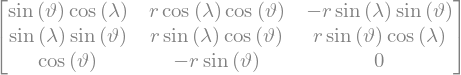

In [6]:
J = Matrix(D).jacobian(S)
J

И находим метрических тензор, диагональными элементами которого являются квадраты коэффициентов Ламе:

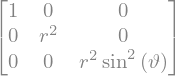

In [7]:
g = simplify(J.T*J)
g

То есть коэффициентами Ламе для сферической системы координат такие:

$$
h_1 = 1,\quad h_2 = r,\quad h_2 = r\sin{\vartheta}.
$$

Находим обратный тензор:

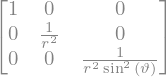

In [8]:
g_inv = g.inv(method="ADJ")
g_inv

Определитель матрицы Якоби:

In [9]:
g_det = g.det()
g_det

Наконец, находим лапласиан в сферических координатах:

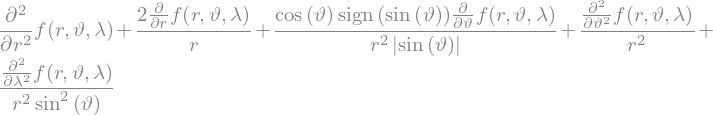

In [10]:
lap_sph = 0
for i in range(3):
    for j in range(3):
        lap_sph += (sqrt(g_det) * g_inv[i,j] * f.diff(S[j])).diff(S[i])
lap_sph = expand(lap_sph / sqrt(g_det))
lap_sph

Здесь, во-первых, можно заменить знак при синусе в третьем члене, чего SymPy не смог сделать самостоятельно, во-вторых, в том же члене заменить отношение синуса и косинуса на тангенс:

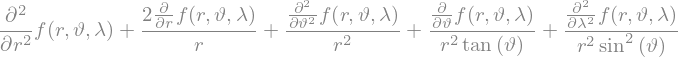

In [11]:
lap_sph = trigsimp(lap_sph.replace(sym.Abs, sym.Id)
                   .replace(sym.sign(sin(theta)), 1))
lap_sph

Таким образом, уравнение Лапласа в сферических координатах имеет вид:

$$
\boxed{\Delta f \left( r, \vartheta, \lambda \right) = \frac{\partial^{2} f}{\partial r^{2}} + 
\frac{2}{r} \frac{\partial f}{\partial r} + 
\frac{1}{r^{2}} \frac{\partial^{2} f}{\partial \vartheta^{2}}  + 
\frac{1}{r^{2} \tan{\left(\vartheta \right)}} \frac{\partial f}{\partial \vartheta} + 
\frac{1}{r^{2} \sin^{2}{\left(\vartheta \right)}} \frac{\partial^{2} f}{\partial \lambda^{2}} =0}.
$$

Естественно, что можно было бы и вовсе не пользоваться тензорами при выводе, а вычислить коэффициенты Ламе, пользуясь их явным выражением, приведённом выше.

### Использовано:

1. [sympy/examples/advanced/curvilinear_coordinates.py](https://github.com/sympy/sympy/blob/master/examples/advanced/curvilinear_coordinates.py)
2. [Curvilinear coordinates with Python SymPy](https://balbuceosastropy.blogspot.com/2015/04/change-of-curvilinear-coordinates-with.html)
3. [Curvilinear coordinates](https://en.wikipedia.org/wiki/Curvilinear_coordinates)